# Assignment 1

### 0.0 Import Dependencies

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import get_dummies
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### 1.1 Know Your Data

In [2]:
data = pd.read_csv("loan_data.csv", header=0)
data.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
# condensed version of the commented code below
data.describe() 
#data.count()
#data.mean()
#data.std()
#data.min()
#data.max()
#data.quantile(0.25)
#data.quantile(0.50)
#data.quantile(0.75)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9.577000e+03,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000
mean,0.805054,0.122638,319.033619,10.932082,12.606295,710.844106,4560.748482,1.691177e+04,46.798171,1.577007,0.163726,0.062128,0.159967
std,0.396180,0.026848,207.010102,0.614835,6.884227,37.971904,2497.060076,3.375727e+04,29.015745,2.199896,0.546241,0.262139,0.366594
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.210000,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928238,12.660000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.350000,11.291780,17.950000,737.000000,5730.000000,1.824200e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
# Sum all data within the dataframe to see the credit policy breakdown
data.sum()

credit.policy                                                     7710
purpose              debt_consolidationcredit_carddebt_consolidatio...
int.rate                                                       1174.51
installment                                                3.05538e+06
log.annual.inc                                                  104697
dti                                                             120730
fico                                                           6807754
days.with.cr.line                                          4.36783e+07
revol.bal                                                    161964067
revol.util                                                      448186
inq.last.6mths                                                   15103
delinq.2yrs                                                       1568
pub.rec                                                            595
not.fully.paid                                                    1532
dtype:

In [5]:
# Further breakdown of the credit approval status to show exact numbers
print(data['credit.policy'].value_counts())

1    7710
0    1867
Name: credit.policy, dtype: int64


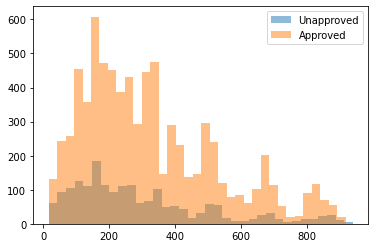

In [6]:
# In a single plot, draw the histogram of installments by “approved” and “not approved”
series = data[['credit.policy','installment']]
series1 = series[series['credit.policy'] == 0]
series2 = series[series['credit.policy'] == 1]
plt.hist(series1['installment'], bins=35, label='Unapproved', alpha=0.5)
plt.hist(series2['installment'], bins=35, label='Approved', alpha=0.5)
plt.legend(loc='best')
plt.show()

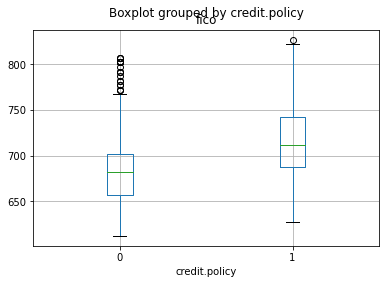

In [7]:
box = data.boxplot("fico", by="credit.policy")

### 1.2.1 Data Preprocessing and Splitting

In [15]:

# creating dummy variables that scikit-learn can recognize
dummy = pd.get_dummies(data['purpose'])
#dummy.head()

# collect all features into a seperate list, excluding the target feature
feature_cols = ['int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec']
frames = [data[feature_cols], dummy[['all_other', 'credit_card', 'debt_consolidation', 'educational', 'home_improvement', 'major_purchase', 'small_business']]]

# combine feature and dummy variables into one dataframe
X = pd.concat(frames, axis=1, join='inner')

# collect target column into a variable
y = data['not.fully.paid']

# 70% and 30% is set between training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#1.2.2 Training a Decision Tree
    
# Create model for normal decision tree, gini and information gain
# We want to create a normal decision tree for a comparision of the prediction value

# Decision Tree Model
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, y_pred))
print()
    
# Gini and Ig Model (aka Entropy)
gini_model = DecisionTreeClassifier(criterion='gini')
ig_model = DecisionTreeClassifier(criterion='entropy')
    
# Fit each model with training data
gini_model.fit(x_train,y_train)
ig_model.fit(x_train,y_train)

# 10-Fold Cross-Validation
cross_gini = cross_val_score(estimator=gini_model, X=x_train, y=y_train, cv=10)
cross_ig = cross_val_score(estimator=ig_model, X=x_train, y=y_train, cv=10)

# Mean Calculation
mean_gini = cross_gini.mean()
mean_ig = cross_ig.mean()

print("Cross-Validation Score for Gini: ", cross_gini)
print("Mean Cross-Validation for Gini: ", mean_gini)
print()
print("Cross-Validation Score for Information Gain: ", cross_ig)
print("Mean Cross-Validation for Information Gain: ", mean_ig)
    

Decision Tree Accuracy: 0.7299930410577592

Cross-Validation Score for Gini:  [0.74068554 0.74515648 0.73174367 0.7358209  0.74925373 0.73283582
 0.74626866 0.72985075 0.72238806 0.77014925]
Mean Cross-Validation for Gini:  0.7404152857174633

Cross-Validation Score for Information Gain:  [0.72876304 0.74515648 0.7466468  0.74477612 0.75970149 0.75074627
 0.74328358 0.75373134 0.73134328 0.74179104]
Mean Cross-Validation for Information Gain:  0.7445939453255332


### 1.2.3 Training a Random Forest

In [16]:
# Random Forst (RF) Model
rf = RandomForestClassifier(n_estimators=15, max_samples=1000)
rf = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Random Forst Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print()

# Gini and Information RF Models
gini_rf_model = RandomForestClassifier(n_estimators=15, criterion='gini', max_samples=1000)
ig_rf_model = RandomForestClassifier(n_estimators=15, criterion='entropy', max_samples=1000)

# 10-Fold Cross-Validation on RF
cross_rf_gini = cross_val_score(estimator=gini_rf_model, X=x_train, y=y_train, cv=10)
cross_rf_ig = cross_val_score(estimator=ig_rf_model, X=x_train, y=y_train, cv=10)

# Mean Calculation 
mean_rf_gini = cross_rf_gini.mean()
mean_rf_ig = cross_rf_ig.mean()

print("Cross-Validation Score for RF Gini: ", cross_rf_gini)
print("Mean Cross-Validation for RF Gini: ", mean_rf_gini)
print()
print("Cross-Validation Score for RF Information Gain: ", cross_rf_ig)
print("Mean Cross-Validation for RF Information Gain: ", mean_rf_ig)


Random Forst Accuracy:  0.8239387613082811

Cross-Validation Score for RF Gini:  [0.83308495 0.83308495 0.83457526 0.84029851 0.83880597 0.82835821
 0.82686567 0.84328358 0.82985075 0.84179104]
Mean Cross-Validation for RF Gini:  0.8349998887826147

Cross-Validation Score for RF Information Gain:  [0.84202683 0.83010432 0.83308495 0.84029851 0.84179104 0.84029851
 0.84776119 0.84179104 0.83731343 0.83731343]
Mean Cross-Validation for RF Information Gain:  0.8391783259559134


### 1.3 Performance Evaluation and Analysis

In [19]:
# Testing Decision Tree Classifier using the three evaluation metrics
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("Decision Tree Classifier Metrics: ")
print("Precision Score: ", precision_score(y_test,y_pred,average=None))
print("Recall Score: ", recall_score(y_test,y_pred,average=None))
print("F-Score: ", f1_score(y_test,y_pred,average=None))
print()

# Testing Random Forest Classifier using the three evaluation metrics
rf = RandomForestClassifier(n_estimators=15, max_samples=1000)
rf = rf.fit(x_train, y_train)
y_rf_pred = rf.predict(x_test)
print("Random Forests Classifier Metrics: ")
print("Precision Score: ", precision_score(y_test,y_rf_pred,average=None))
print("Recall Score: ", recall_score(y_test,y_rf_pred,average=None))
print("F-Score: ", f1_score(y_test,y_rf_pred,average=None))
print()


Decision Tree Classifier Metrics: 
Precision Score:  [0.84498736 0.246     ]
Recall Score:  [0.84179606 0.25050916]
F-Score:  [0.84338869 0.24823411]

Random Forests Classifier Metrics: 
Precision Score:  [0.83180536 0.36842105]
Recall Score:  [0.98992866 0.02851324]
F-Score:  [0.9040046  0.05293006]



In [ ]:
## Summary and analysis of the results based on my observations

# Based on my observations that I have made while seeing the metric results from both the Decision Tree Classifier (DTC) and Random Forest Classifier (RFC), that both have similar precision scores with DTC beating RFC by 0.013182.
# However, RFC has a higher recall and f-score when compared to DTC. So, what does this mean, since recall is the measure of our model correctly identifying True Positives and our RFC model outputs 0.88992866 this would be our True Positive Rate.
# In addition, RFC is achieving a higher F-Score of 0.9040046. The recall and f-score would be more important metrics when we want to detect as many heart disease patients, but in our use case we want to classify whether
# a bank customer is able to get a loan in which I believe a higher precision score would be preferable since the bank wouldn’t want to lose customers who were denied a loan based on the model’s prediction that they would be defaulters. 
# Therefore, I this would justify that DTC would be a better model for our use case rather than RFC due to its slightly higher precision score. 